In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

a = np.array([1,0,1,1,0,1,1])
b = np.array([1,1,0,0,0,1,1])

confusion_matrix(b,a)

array([[1, 2],
       [1, 3]], dtype=int64)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(b,a)
    accuracy = accuracy_score(b,a)
    precision = precision_score(b,a)
    recall = recall_score(b,a)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}'.format(accuracy,precision,recall))

In [5]:
get_clf_eval(b,a)

오차 행렬
[[1 2]
 [1 3]]
정확도 : 0.5714, 정밀도 : 0.6000, 재현율 : 0.7500


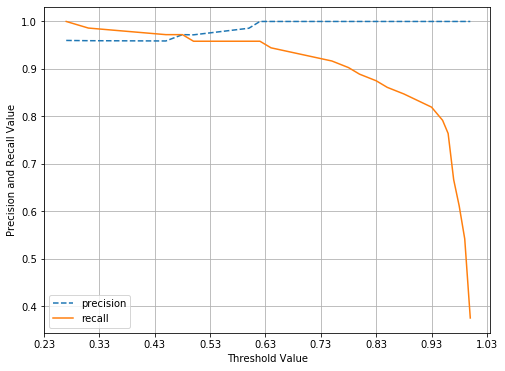

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
import numpy as np
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(8,6))
#     print(thresholds)
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle = '--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()
bc = load_breast_cancer()
rf = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=.2,random_state=454,
                                                   stratify=bc.target)
rf.fit(x_train,y_train)
precision_recall_curve_plot(y_test,rf.predict_proba(x_test)[:,1])

In [18]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,rf.predict(x_test))
print(np.round(f1,4))

0.9718


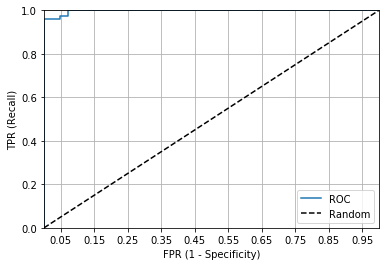

In [19]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label="ROC")
    plt.plot([0,1],[0,1],'k--',label="Random")
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR (1 - Specificity)')
    plt.ylabel('TPR (Recall)')
    plt.legend()
    plt.grid()
roc_curve_plot(y_test,rf.predict_proba(x_test)[:,1])


In [20]:
from sklearn.metrics import roc_auc_score

pred = rf.predict(x_test)
roc_score = roc_auc_score(y_test,pred)
print('ROC AUC Value : {:.4f}'.format(roc_score))

ROC AUC Value : 0.9673


# Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=111)
iris_data = load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,random_state=111,
                                                test_size=.2,stratify=iris_data.target)
dt_clf.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='best')

In [23]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file = 'tree.dot',class_names = iris_data.target_names,
               feature_names = iris_data.feature_names, impurity=True, filled=True)

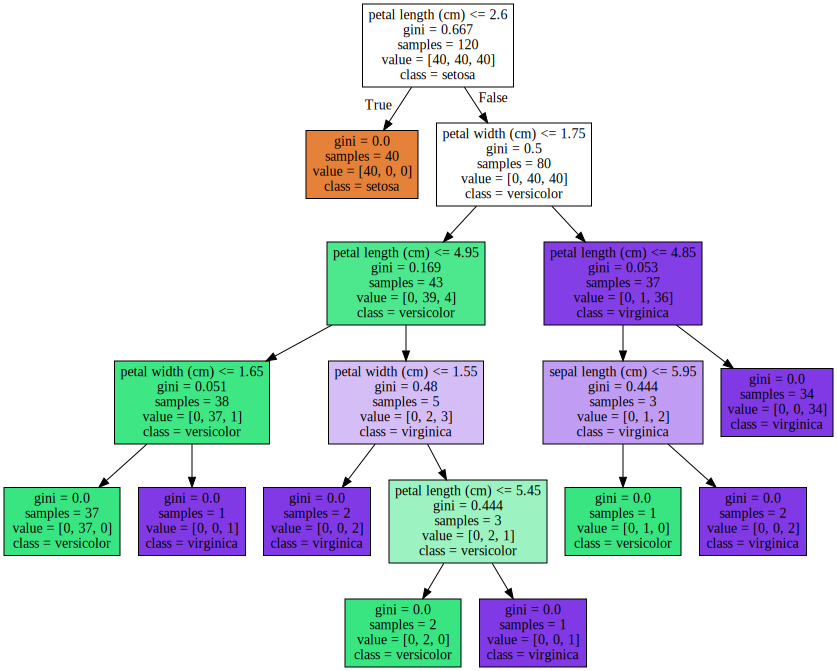

In [26]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [27]:
dt_clf.feature_importances_

array([0.01666667, 0.        , 0.56067989, 0.42265344])

[0.01666667 0.         0.56067989 0.42265344]
sepal length (cm) : 0.0167
sepal width (cm) : 0.0000
petal length (cm) : 0.5607
petal width (cm) : 0.4227


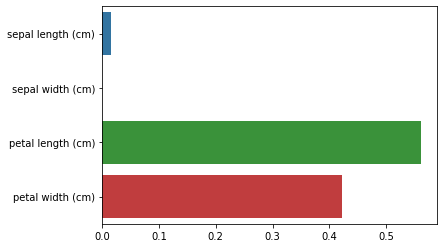

In [30]:
import seaborn as sns
print(dt_clf.feature_importances_)
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{} : {:.4f}'.format(name,value))
sns.barplot(x=dt_clf.feature_importances_,y = iris_data.feature_names)

# Ensemble

In [31]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
vote = VotingClassifier(estimators=[('LR',lr),('KNN',knn)], voting='soft')
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=.2,random_state=121)

vote.fit(x_train,y_train)
pred = vote.predict(x_test)
print('Voting Classifier Acc: {:.4f}'.format(accuracy_score(y_test,pred)))

Voting Classifier Acc: 0.9561


In [41]:
rf = RandomForestClassifier()
vote = VotingClassifier(estimators=[('LR',lr),('KNN',knn),('RF',rf)],voting='soft')
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=.2,random_state=121)
vote.fit(x_train,y_train)
print('Voting Classifier Acc: {:.4f}'.format(accuracy_score(y_test,vote.predict(x_test))))

Voting Classifier Acc: 0.9825


In [47]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,300],'max_depth':[10,14],'min_samples_leaf':[6,8],'min_samples_split':[4,8]}
rf_clf = RandomForestClassifier(random_state=454,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid = params,cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)
print(grid_cv.best_params_)
print('Top 1 Acc : {:.4f} %'.format(grid_cv.best_score_*100))

{'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 100}
Top 1 Acc : 95.6063 %


20

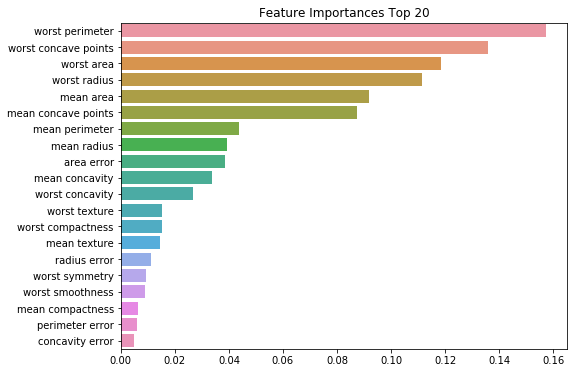

In [60]:
rf_clf = grid_cv.best_estimator_
ftr_importance_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importance_values,index=cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
print(accuracy_score(gb_pred,y_test))
print(time.time()-start_time)

0.9824561403508771
0.5427234172821045


In [62]:
import xgboost as xgb
from xgboost import XGBClassifier

In [64]:
xgb.__version__

'0.90'

In [65]:
cancer_df = pd.DataFrame(data=x_train,columns=cancer.feature_names)
cancer_df['target']=y_train
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.18100,0.08388,0.3297,0.07834,1
1,16.500,18.29,106.60,838.1,0.09686,0.08468,0.058620,0.048350,0.1495,0.05593,...,25.45,117.20,1009.0,0.1338,0.1679,0.16630,0.09123,0.2394,0.06469,1
2,12.340,26.86,81.15,477.4,0.10340,0.13530,0.108500,0.045620,0.1943,0.06937,...,39.34,101.70,768.9,0.1785,0.4706,0.44250,0.14590,0.3215,0.12050,0
3,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,...,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742,1
4,9.397,21.68,59.75,268.8,0.07969,0.06053,0.037350,0.005128,0.1274,0.06724,...,27.99,66.61,301.0,0.1086,0.1887,0.18680,0.02564,0.2376,0.09206,1


In [66]:
cancer_df['target'].value_counts()

1    287
0    168
Name: target, dtype: int64

In [67]:
dtrain = xgb.DMatrix(data=x_train,label=y_train)
dtest = xgb.DMatrix(data=x_test,label=y_test)

In [68]:
params= {'max_depth':3,
        'eta':0.1,
        'objective':'binary:logistic',
        'eval_metric':'logloss',
        'early_stoppings':100}
num_rounds = 400

In [69]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round=num_rounds,evals=wlist)

[0]	train-logloss:0.609144	eval-logloss:0.610736
[1]	train-logloss:0.540292	eval-logloss:0.5433
[2]	train-logloss:0.482639	eval-logloss:0.487029
[3]	train-logloss:0.434989	eval-logloss:0.438067
[4]	train-logloss:0.394395	eval-logloss:0.397395
[5]	train-logloss:0.357664	eval-logloss:0.361644
[6]	train-logloss:0.327186	eval-logloss:0.331551
[7]	train-logloss:0.298931	eval-logloss:0.304548
[8]	train-logloss:0.274154	eval-logloss:0.280629
[9]	train-logloss:0.252445	eval-logloss:0.258356
[10]	train-logloss:0.234144	eval-logloss:0.238805
[11]	train-logloss:0.215868	eval-logloss:0.218612
[12]	train-logloss:0.199497	eval-logloss:0.201905
[13]	train-logloss:0.185776	eval-logloss:0.187598
[14]	train-logloss:0.172078	eval-logloss:0.174341
[15]	train-logloss:0.159575	eval-logloss:0.16118
[16]	train-logloss:0.149029	eval-logloss:0.148825
[17]	train-logloss:0.138907	eval-logloss:0.138196
[18]	train-logloss:0.130603	eval-logloss:0.131359
[19]	train-logloss:0.1224	eval-logloss:0.122188
[20]	train-logl

[164]	train-logloss:0.00813	eval-logloss:0.015719
[165]	train-logloss:0.008091	eval-logloss:0.015642
[166]	train-logloss:0.008047	eval-logloss:0.015539
[167]	train-logloss:0.007988	eval-logloss:0.015512
[168]	train-logloss:0.007951	eval-logloss:0.015404
[169]	train-logloss:0.007931	eval-logloss:0.015332
[170]	train-logloss:0.007894	eval-logloss:0.015295
[171]	train-logloss:0.00784	eval-logloss:0.01531
[172]	train-logloss:0.007791	eval-logloss:0.015217
[173]	train-logloss:0.007752	eval-logloss:0.015124
[174]	train-logloss:0.007733	eval-logloss:0.015188
[175]	train-logloss:0.007704	eval-logloss:0.015023
[176]	train-logloss:0.007656	eval-logloss:0.015039
[177]	train-logloss:0.007638	eval-logloss:0.014973
[178]	train-logloss:0.007611	eval-logloss:0.014847
[179]	train-logloss:0.007566	eval-logloss:0.014867
[180]	train-logloss:0.007549	eval-logloss:0.014788
[181]	train-logloss:0.007517	eval-logloss:0.01487
[182]	train-logloss:0.007501	eval-logloss:0.014933
[183]	train-logloss:0.007484	eval-l

[326]	train-logloss:0.005936	eval-logloss:0.01239
[327]	train-logloss:0.00593	eval-logloss:0.012351
[328]	train-logloss:0.005923	eval-logloss:0.012397
[329]	train-logloss:0.005916	eval-logloss:0.012373
[330]	train-logloss:0.005909	eval-logloss:0.012351
[331]	train-logloss:0.005903	eval-logloss:0.012317
[332]	train-logloss:0.005896	eval-logloss:0.012306
[333]	train-logloss:0.005889	eval-logloss:0.012269
[334]	train-logloss:0.005883	eval-logloss:0.012253
[335]	train-logloss:0.005876	eval-logloss:0.01227
[336]	train-logloss:0.005869	eval-logloss:0.012247
[337]	train-logloss:0.005863	eval-logloss:0.01224
[338]	train-logloss:0.005856	eval-logloss:0.012239
[339]	train-logloss:0.00585	eval-logloss:0.012284
[340]	train-logloss:0.005843	eval-logloss:0.012262
[341]	train-logloss:0.005837	eval-logloss:0.012225
[342]	train-logloss:0.00583	eval-logloss:0.012224
[343]	train-logloss:0.005824	eval-logloss:0.012217
[344]	train-logloss:0.005818	eval-logloss:0.012202
[345]	train-logloss:0.005812	eval-log

In [70]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

[0.    1.    0.999 1.    0.999 0.    1.    0.999 0.    0.   ]


In [71]:
preds = [1 if x > 0.5 else 0 for x in pred_probs]

In [74]:
print(accuracy_score(preds,y_test)*100,'%')

100.0 %


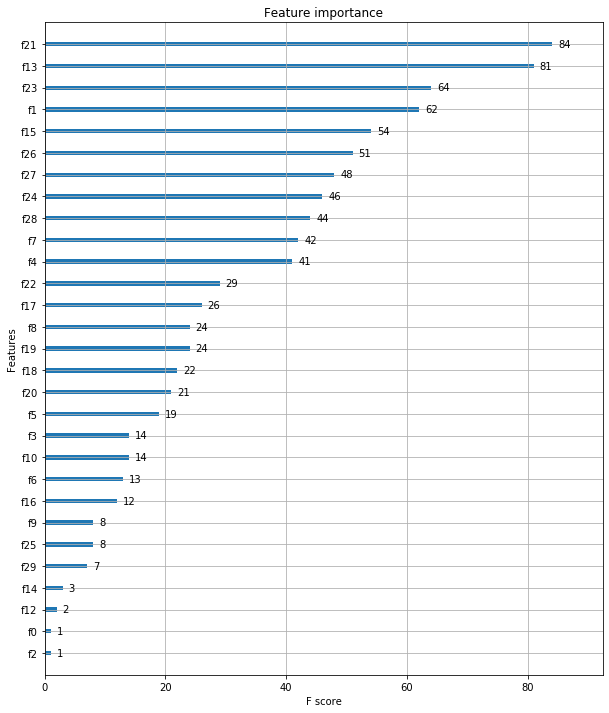

In [75]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [79]:
from xgboost import XGBClassifier
evals = [(x_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=4000,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals)
w_preds = xgb_wrapper.predict(x_test)
print(accuracy_score(w_preds,y_test)*100,'%')

[0]	validation_0-logloss:0.610735
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.543301
[2]	validation_0-logloss:0.487029
[3]	validation_0-logloss:0.438067
[4]	validation_0-logloss:0.397395
[5]	validation_0-logloss:0.361644
[6]	validation_0-logloss:0.331551
[7]	validation_0-logloss:0.304548
[8]	validation_0-logloss:0.280629
[9]	validation_0-logloss:0.258356
[10]	validation_0-logloss:0.238805
[11]	validation_0-logloss:0.218613
[12]	validation_0-logloss:0.201905
[13]	validation_0-logloss:0.187598
[14]	validation_0-logloss:0.174341
[15]	validation_0-logloss:0.16118
[16]	validation_0-logloss:0.148825
[17]	validation_0-logloss:0.138196
[18]	validation_0-logloss:0.131359
[19]	validation_0-logloss:0.122188
[20]	validation_0-logloss:0.114078
[21]	validation_0-logloss:0.107824
[22]	validation_0-logloss:0.100785
[23]	validation_0-logloss:0.095421
[24]	validation_0-logloss:0.090397
[25]	validation_0-logloss:0.087146
[26]	validation_0-logloss:0.0837

[230]	validation_0-logloss:0.013938
[231]	validation_0-logloss:0.013942
[232]	validation_0-logloss:0.013934
[233]	validation_0-logloss:0.01388
[234]	validation_0-logloss:0.013855
[235]	validation_0-logloss:0.013858
[236]	validation_0-logloss:0.013774
[237]	validation_0-logloss:0.013729
[238]	validation_0-logloss:0.013699
[239]	validation_0-logloss:0.013753
[240]	validation_0-logloss:0.013701
[241]	validation_0-logloss:0.013659
[242]	validation_0-logloss:0.013627
[243]	validation_0-logloss:0.013681
[244]	validation_0-logloss:0.013675
[245]	validation_0-logloss:0.013728
[246]	validation_0-logloss:0.013659
[247]	validation_0-logloss:0.013615
[248]	validation_0-logloss:0.01363
[249]	validation_0-logloss:0.013603
[250]	validation_0-logloss:0.013551
[251]	validation_0-logloss:0.013569
[252]	validation_0-logloss:0.013521
[253]	validation_0-logloss:0.013516
[254]	validation_0-logloss:0.01352
[255]	validation_0-logloss:0.013471
[256]	validation_0-logloss:0.013444
[257]	validation_0-logloss:0.01

[459]	validation_0-logloss:0.010948
[460]	validation_0-logloss:0.010943
[461]	validation_0-logloss:0.01093
[462]	validation_0-logloss:0.010962
[463]	validation_0-logloss:0.010958
[464]	validation_0-logloss:0.010958
[465]	validation_0-logloss:0.010935
[466]	validation_0-logloss:0.010931
[467]	validation_0-logloss:0.01093
[468]	validation_0-logloss:0.010931
[469]	validation_0-logloss:0.010918
[470]	validation_0-logloss:0.010928
[471]	validation_0-logloss:0.010924
[472]	validation_0-logloss:0.010924
[473]	validation_0-logloss:0.010925
[474]	validation_0-logloss:0.010904
[475]	validation_0-logloss:0.010881
[476]	validation_0-logloss:0.010869
[477]	validation_0-logloss:0.010865
[478]	validation_0-logloss:0.010865
[479]	validation_0-logloss:0.010866
[480]	validation_0-logloss:0.010876
[481]	validation_0-logloss:0.010875
[482]	validation_0-logloss:0.010872
[483]	validation_0-logloss:0.010859
[484]	validation_0-logloss:0.010838
[485]	validation_0-logloss:0.010839
[486]	validation_0-logloss:0.0

[688]	validation_0-logloss:0.010048
[689]	validation_0-logloss:0.010029
[690]	validation_0-logloss:0.010018
[691]	validation_0-logloss:0.010017
[692]	validation_0-logloss:0.009999
[693]	validation_0-logloss:0.009988
[694]	validation_0-logloss:0.00997
[695]	validation_0-logloss:0.009969
[696]	validation_0-logloss:0.009959
[697]	validation_0-logloss:0.00996
[698]	validation_0-logloss:0.00995
[699]	validation_0-logloss:0.009951
[700]	validation_0-logloss:0.00995
[701]	validation_0-logloss:0.00995
[702]	validation_0-logloss:0.009949
[703]	validation_0-logloss:0.009945
[704]	validation_0-logloss:0.009946
[705]	validation_0-logloss:0.009945
[706]	validation_0-logloss:0.009936
[707]	validation_0-logloss:0.009937
[708]	validation_0-logloss:0.009937
[709]	validation_0-logloss:0.009937
[710]	validation_0-logloss:0.009937
[711]	validation_0-logloss:0.009937
[712]	validation_0-logloss:0.009937
[713]	validation_0-logloss:0.009937
[714]	validation_0-logloss:0.009937
[715]	validation_0-logloss:0.0099

In [83]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=4000)
lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set = evals)
preds=lgbm_wrapper.predict(x_test)

[1]	valid_0's binary_logloss: 0.579598
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.516407
[3]	valid_0's binary_logloss: 0.459981
[4]	valid_0's binary_logloss: 0.413018
[5]	valid_0's binary_logloss: 0.372278
[6]	valid_0's binary_logloss: 0.337532
[7]	valid_0's binary_logloss: 0.310022
[8]	valid_0's binary_logloss: 0.283342
[9]	valid_0's binary_logloss: 0.259148
[10]	valid_0's binary_logloss: 0.238274
[11]	valid_0's binary_logloss: 0.219423
[12]	valid_0's binary_logloss: 0.202153
[13]	valid_0's binary_logloss: 0.188953
[14]	valid_0's binary_logloss: 0.175337
[15]	valid_0's binary_logloss: 0.162587
[16]	valid_0's binary_logloss: 0.153236
[17]	valid_0's binary_logloss: 0.143626
[18]	valid_0's binary_logloss: 0.133669
[19]	valid_0's binary_logloss: 0.12523
[20]	valid_0's binary_logloss: 0.117471
[21]	valid_0's binary_logloss: 0.112309
[22]	valid_0's binary_logloss: 0.105754
[23]	valid_0's binary_logloss: 0.0992657
[24]	valid_0's binary_loglo

[322]	valid_0's binary_logloss: 0.0105714
[323]	valid_0's binary_logloss: 0.0106683
[324]	valid_0's binary_logloss: 0.0105743
[325]	valid_0's binary_logloss: 0.010663
[326]	valid_0's binary_logloss: 0.0105716
[327]	valid_0's binary_logloss: 0.0106653
[328]	valid_0's binary_logloss: 0.0105917
[329]	valid_0's binary_logloss: 0.0106821
[330]	valid_0's binary_logloss: 0.01059
[331]	valid_0's binary_logloss: 0.0105135
[332]	valid_0's binary_logloss: 0.0106105
[333]	valid_0's binary_logloss: 0.0105128
[334]	valid_0's binary_logloss: 0.0106057
[335]	valid_0's binary_logloss: 0.0105344
[336]	valid_0's binary_logloss: 0.0106237
[337]	valid_0's binary_logloss: 0.0105358
[338]	valid_0's binary_logloss: 0.0106232
[339]	valid_0's binary_logloss: 0.0107113
[340]	valid_0's binary_logloss: 0.010622
[341]	valid_0's binary_logloss: 0.0105512
[342]	valid_0's binary_logloss: 0.0106365
[343]	valid_0's binary_logloss: 0.0105497
[344]	valid_0's binary_logloss: 0.0104635
[345]	valid_0's binary_logloss: 0.0105

[544]	valid_0's binary_logloss: 0.00929168
[545]	valid_0's binary_logloss: 0.00929168
[546]	valid_0's binary_logloss: 0.00929168
[547]	valid_0's binary_logloss: 0.00929168
[548]	valid_0's binary_logloss: 0.00929168
[549]	valid_0's binary_logloss: 0.00929168
[550]	valid_0's binary_logloss: 0.00929168
[551]	valid_0's binary_logloss: 0.00929168
[552]	valid_0's binary_logloss: 0.00929168
[553]	valid_0's binary_logloss: 0.00929168
[554]	valid_0's binary_logloss: 0.00929168
[555]	valid_0's binary_logloss: 0.00929168
[556]	valid_0's binary_logloss: 0.00929168
[557]	valid_0's binary_logloss: 0.00929168
[558]	valid_0's binary_logloss: 0.00929168
[559]	valid_0's binary_logloss: 0.00929168
[560]	valid_0's binary_logloss: 0.00929168
[561]	valid_0's binary_logloss: 0.00929168
[562]	valid_0's binary_logloss: 0.00929168
[563]	valid_0's binary_logloss: 0.00929168
[564]	valid_0's binary_logloss: 0.00929168
[565]	valid_0's binary_logloss: 0.00929168
[566]	valid_0's binary_logloss: 0.00929168
[567]	valid

In [84]:
print(accuracy_score(preds,y_test))

0.9912280701754386


# Stacking Ensemble

In [85]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

knn= KNeighborsClassifier(n_neighbors=4)
rf= RandomForestClassifier(n_estimators=100,random_state=10)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression(C=10)

knn.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
ada.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
rf_pred = rf.predict(x_test)
dt_pred = dt.predict(x_test)
ada_pred = ada.predict(x_test)
print(accuracy_score(knn_pred,y_test))
print(accuracy_score(rf_pred,y_test))
print(accuracy_score(dt_pred,y_test))
print(accuracy_score(ada_pred,y_test))

0.9385964912280702
0.9824561403508771
0.956140350877193
0.9912280701754386


In [87]:
pred= np.array([knn_pred,rf_pred,dt_pred,ada_pred])
pred.shape

(4, 114)

In [88]:
pred= pred.T

In [89]:
lr.fit(pred,y_test)
final = lr.predict(pred)
print(accuracy_score(final,y_test))

1.0


# CV STACKING

In [95]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, x_train_n,y_train_n,x_test_n,n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    train_fold_pred = np.zeros((x_train_n.shape[0],1))
    test_pred = np.zeros((x_test_n.shape[0],n_folds))
    print(model.__class__.__name__,'model start')
    
    for folder_counter,(train_index,valid_index) in enumerate(kf.split(x_train_n)):
        print('\t fold set: ',folder_counter,' start ')
        x_tr = x_train_n[train_index]
        y_tr = y_train_n[train_index]
        x_te = x_train_n[valid_index]
        
        model.fit(x_tr,y_tr)
        train_fold_pred[valid_index,:] = model.predict(x_te).reshape(-1,1)
        test_pred[:,folder_counter] = model.predict(x_test_n)
    test_pred_mean = np.mean(test_pred,axis= 1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

knn_train,knn_test = get_stacking_base_datasets(knn,x_train,y_train,x_test,7)
rf_train,rf_test = get_stacking_base_datasets(rf,x_train,y_train,x_test,7)
dt_train,dt_test = get_stacking_base_datasets(dt,x_train,y_train,x_test,7)
ada_train,ada_test = get_stacking_base_datasets(ada,x_train,y_train,x_test,7)

KNeighborsClassifier model start
	 fold set:  0  start 
	 fold set:  1  start 
	 fold set:  2  start 
	 fold set:  3  start 
	 fold set:  4  start 
	 fold set:  5  start 
	 fold set:  6  start 
RandomForestClassifier model start
	 fold set:  0  start 
	 fold set:  1  start 
	 fold set:  2  start 
	 fold set:  3  start 
	 fold set:  4  start 
	 fold set:  5  start 
	 fold set:  6  start 
DecisionTreeClassifier model start
	 fold set:  0  start 
	 fold set:  1  start 
	 fold set:  2  start 
	 fold set:  3  start 
	 fold set:  4  start 
	 fold set:  5  start 
	 fold set:  6  start 
AdaBoostClassifier model start
	 fold set:  0  start 
	 fold set:  1  start 
	 fold set:  2  start 
	 fold set:  3  start 
	 fold set:  4  start 
	 fold set:  5  start 
	 fold set:  6  start 


In [96]:
stack_final_x_train = np.concatenate((knn_train,rf_train,dt_train,ada_train),axis=1)
stack_final_x_test = np.concatenate((knn_test,rf_test,dt_test,ada_test),axis=1)
print(x_train.shape, x_test.shape)
print(stack_final_x_train.shape,stack_final_x_test.shape)

(455, 30) (114, 30)
(455, 4) (114, 4)


In [97]:
lr.fit(stack_final_x_train,y_train)
pred = lr.predict(stack_final_x_test)
print(accuracy_score(y_test,pred))

0.9824561403508771


# Regression

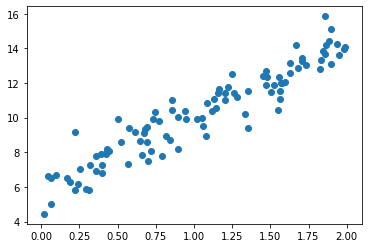

In [98]:
x = 2* np.random.rand(100,1)
y = 6 +4*x +np.random.randn(100,1)
plt.scatter(x,y)

In [102]:
def get_weight_updates(w1,w0,x,y,lr = 0.01):
    N = len(y)
    w1_u = np.zeros_like(w1)
    w0_u = np.zeros_like(w0)
    
    y_pred = np.dot(x,w1.T)+w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_u = -(2/N)*lr*(np.dot(x.T,diff))
    w0_u = -(2/N)*lr*(np.dot(w0_factors.T,diff))
    return w1_u,w0_u

def gradient_descent_steps(x,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_u,w0_u = get_weight_updates(w1,w0,x,y,lr=0.01)
        w1 -= w1_u
        w0 -= w0_u
        
    return w1,w0

def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_descent_steps(x,y,1000)
print('w1 : {:.4f} w0 : {:.4f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*x + w0
print('Gradient Descent Total Cost : {:.4f}'.format(get_cost(y,y_pred)))
    

w1 : 4.2764 w0 : 5.7776
Gradient Descent Total Cost : 0.7185


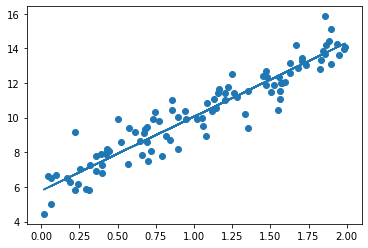

In [103]:
plt.scatter(x,y)
plt.plot(x,y_pred)